# **¿Es en realidad Varadero el centro de atención de Matanzas?**

robablemente si 

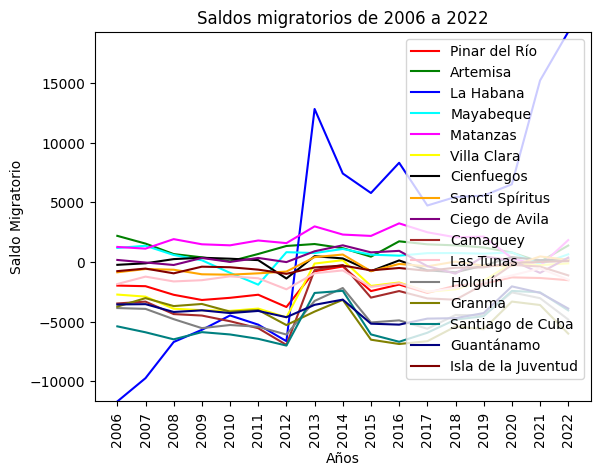

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Importando las tablas a usar

saldo_migratorio = pd.read_csv("C:/Users/crist/Desktop/Proceso-migratorio-en-Matanzas/Proyecto Final/SALDOS MIGRATORIOS DE CUBA.csv")


#Creamos una lista con las distintas provincias del país
provincias = ["Pinar del Río" , "Artemisa" , "La Habana" , "Mayabeque" , "Matanzas ","Villa Clara" , "Cienfuegos" ,"Sancti Spíritus" ,"Ciego de Avila" , "Camaguey" ,"Las Tunas" , "Holguín" , "Granma" , "Santiago de Cuba" , "Guantánamo" , "Isla de la Juventud" ]

datos_provincias_por_anio = saldo_migratorio.values.tolist()

valores_de_provincias = datos_provincias_por_anio[:17]
anios=[]

for sublista in valores_de_provincias :
    anios.append(round(sublista.pop(0)))

valores_de_provincias1 = [list(map(float, valor_de_provincias)) for valor_de_provincias in valores_de_provincias]
valores_de_provincias= [list(row) for row in zip(*valores_de_provincias1)]


fig,ax =plt.subplots()

colors = ['red', 'green', 'blue', 'cyan', 'magenta', 'yellow', 'black',
          'orange', 'purple', 'brown', 'pink', 'gray', 'olive', 'teal',
          'navy', 'maroon']
plt.gca().set_prop_cycle(color=colors)
for provincia ,valor_de_provincias in zip(provincias,valores_de_provincias):
    ax.plot(valor_de_provincias, label=provincia)
ax.set_xticks(range(len(anios)))
ax.set_xticklabels(anios, rotation=90)
ax.set_xlabel("Años")
ax.set_ylabel("Saldo Migratorio")

plt.title("Saldos migratorios de 2006 a 2022")

plt.ylim(min([min(valor_de_provincias) for valor_de_provincias in valores_de_provincias]) ,max([max(valor_de_provincias) for valor_de_provincias in valores_de_provincias]))
plt.legend()
plt.show()

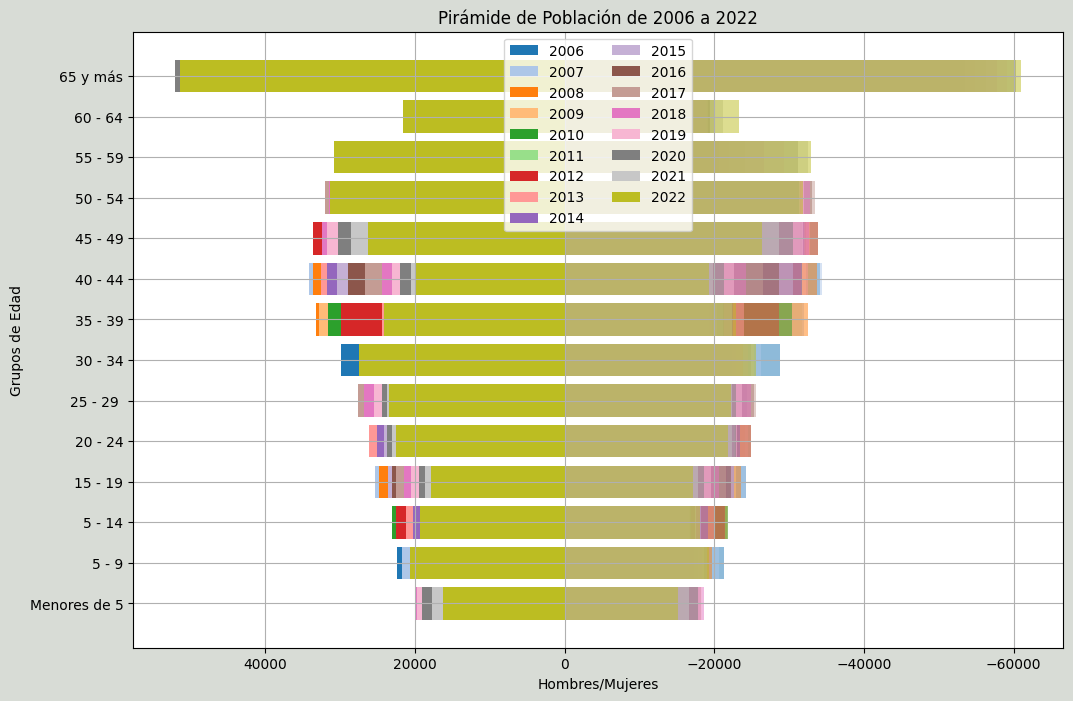

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#Importando las tablas a usar
poblacion_por_municipio=pd.read_csv("C:/Users/crist/Desktop/Proceso-migratorio-en-Matanzas/Proyecto Final/poblacion por edades y sexo mtz.csv")


#Creamos una lista con los distintos grupos de edad a estudiar
edades = ["Menores de 5" ,"5 - 9" , "5 - 14" , "15 - 19" , "20 - 24" , "25 - 29 ","30 - 34" , "35 - 39" ,"40 - 44" ,"45 - 49" , "50 - 54" ,"55 - 59" , "60 - 64" , "65 y más"]
poblacion_por_municipio= poblacion_por_municipio.values.tolist()
#Creando las listas de hombres y mujeres separadas
hombres =[]
mujeres = []
for i in range(len(poblacion_por_municipio)):
    if i % 2 == 0:
        hombres.append(poblacion_por_municipio[i])
    else :
        mujeres.append(poblacion_por_municipio[i])

for hombre in hombres:
     del(hombre[0:3])
for mujer in mujeres:
    del(mujer[0:3])
#Creando los anios
anios = [x for x in range(2006,2023)]

# Crear la figura y los ejes
fig, ax = plt.subplots(figsize=(12, 8))
fig.patch.set_facecolor('xkcd:light grey')


# Crear la paleta de colores
cmap = plt.get_cmap('tab20')
colors = [cmap(i) for i in range(len(anios))]

# Crear la pirámide de población por año
for i, (hombre_anio, mujer_anio) in enumerate(zip(hombres, mujeres)):
    ax.barh(edades, hombre_anio, align='center', color=colors[i], label=f"{anios[i]}")
    ax.barh(edades, -np.array(mujer_anio), align='center', color=colors[i], alpha=0.5)

# Nombrando los componentes de la grafica
ax.set_title(f"Pirámide de Población de 2006 a 2022")
ax.set_xlabel("Hombres/Mujeres")
ax.set_ylabel("Grupos de Edad")
ax.invert_xaxis()
ax.legend(ncol=2, loc='upper center')
ax.grid()

#Finalmente mostramos la grafica
plt.show()

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import nbformat

#Importando las tablas a usar
poblacion_municipios=pd.read_csv("C:/Users/crist/Desktop/Proceso-migratorio-en-Matanzas/Proyecto Final/POBLACION POR MUNICIPIO MTZ.csv" )


#Creamos una lista con los distintos grupos de edad a estudiar
municipios = ["Matanzas" ,"Cárdenas" , "Martí" , "Colón" , "Perico" , "Jovellanos ","Pedro Betancourt" , "Limonar" ,"Unión de Reyes" ,"Ciénaga de Zapata" , "Jagüey Grande" ,"Calimete" , "Los Arabos" ]
poblacion_municipios= poblacion_municipios.values.tolist()
#Limpiando la lista de la poblacion y creando una lista con los anios

for poblacion in poblacion_municipios:
    del poblacion[0]

anios= [x for x in range(2012,2023)]

#Creando el grafico de area
fig = go.Figure()
for i, municipio in enumerate(municipios):
    fig.add_trace(go.Scatter(
        x=anios,
        y=poblacion_municipios[i],
        mode='none',
        fill='tozeroy',
        name=municipio
    ))
#Creando los elementos explicativos
fig.update_layout(
    title="Población de los Municipios por Año",
    xaxis_title="Año",
    yaxis_title="Población",
    legend_title="Municipios"
)
#Mostrando el grafico
fig.show()

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
#Importando las tablas a usar
destino_MTZ = pd.read_csv("C:/Users/crist/Desktop/Proceso-migratorio-en-Matanzas/Proyecto Final/destino MTZ.csv")
#Creando una lista con las distintas provincias que emigran a Matanzas
provincias = ["Pinar del Rio" , "Artemisa", "La Habana" , "Mayabeque" ,"Villa Clara" , "Cienfuegos" , "Sancti Spíritus" ,"Ciego de Avila" , "Camagüey","Las Tunas" , "Holguín" ,"Granma" ,"Santiago de Cuba" ,"Guantánamo" ,"Isla de la juventud"]

#Limpiando las tablas
destino_MTZ=destino_MTZ.values.tolist()

for destino in destino_MTZ:
    del (destino[0:2])

#Calculando los promedios de cada provincia
promedios = []
suma = 0

for destino in destino_MTZ:
    for elemento in destino:
        suma+=elemento
    promedios.append(suma/12)
    suma= 0

#Creando el grafico
fig = px.pie( values=promedios , names=provincias)

fig.update_layout(
    title = "Migración promedio a Matanzas por provincia desde 2011 hasta 2022",
    font_size = 16,
    legend_title_text = "Algo"
)
#Mostrando el grafico
fig.show()

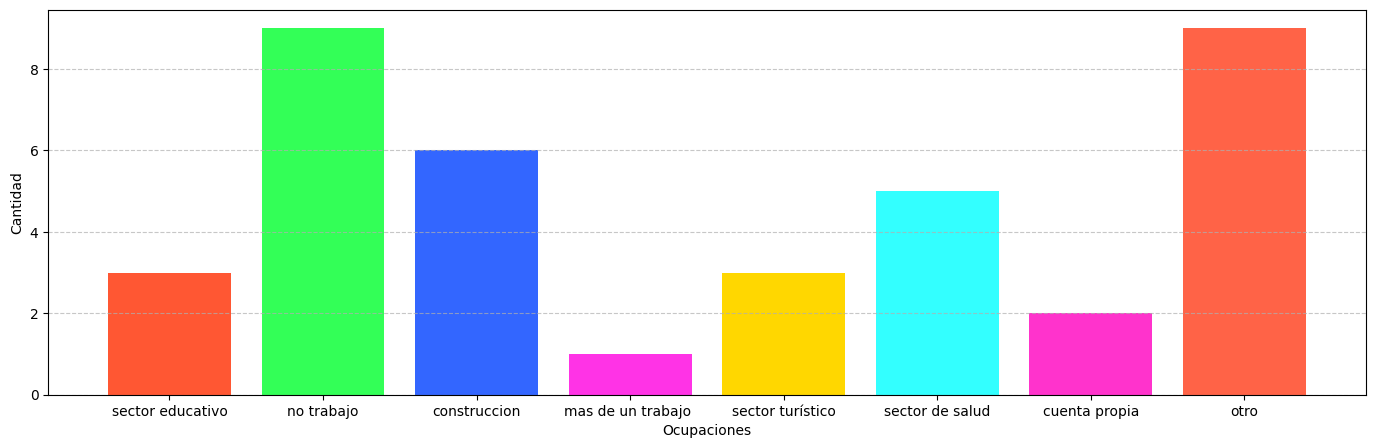

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.graph_objects as go

#Importando las tablas a usar
cant_ocupacion=pd.read_csv("C:/Users/crist/Desktop/Proceso-migratorio-en-Matanzas/Proyecto Final/A que se dedican Encuesta.csv")

cant_ocupacion=cant_ocupacion.values.tolist()

#Limpiando la lista
ocupacion=[]
cantidad=[]
for ocupado in cant_ocupacion:
    ocupacion.append(ocupado[1])
    cantidad.append(ocupado[2])

#Creando la figura
plt.figure(figsize=(17,5))
plt.bar(ocupacion ,cantidad ,color = ['#FF5733', '#33FF57', '#3366FF', '#FF33E6', '#FFD700', '#33FFFF', '#FF33CC', '#FF6347'] )
plt.xlabel("Ocupaciones")
plt.ylabel("Cantidad")
plt.grid(axis= "y" ,linestyle = "--" ,alpha= 0.7)

#Mostrando la figura
plt.show()